In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import colors

In [67]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Классификация

Скачаем данные в датафрейм и разобьем его на фичи (оставим только две, как сказанов в условии) и таргет

In [68]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'sepal width (cm)']]
data_class = iris.target

In [69]:
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [70]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Разобьём на обучение и тест выборку. Обучим LDA

In [77]:
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25, random_state=42)

In [78]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [79]:
lda.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0])

Объединим фичи, истинные и предсказанные значенив в одну таблицу. В принципе, это не обязательно

In [116]:
result = X_test.copy()
result.insert(loc= len(result.columns), column= 'true class', value= y_test)
result.insert(loc= len(result.columns), column= 'prediction', value= lda.predict(X_test))
result.head()

,sepal length (cm),sepal width (cm),true class,prediction
73,6.1,2.8,1,1
18,5.7,3.8,0,0
118,7.7,2.6,2,2
78,6.0,2.9,1,1
76,6.8,2.8,1,2


Метрика accuracy как качство работы модели на тестовой выборке. Значение больше 0,7

In [117]:
accuracy_score(result['true class'], result['prediction'])

0.868421052631579

Истинное распределение тестовой выборки по классам - типам ириса

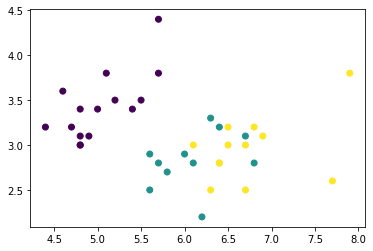

In [120]:
plt.scatter(x=result['sepal length (cm)'], y=result['sepal width (cm)'], c=result['true class'])
plt.show()

Предсказанное распределение тестовой выборки по классам. Есть разница

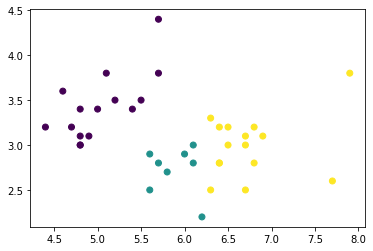

In [121]:
plt.scatter(x=result['sepal length (cm)'], y=result['sepal width (cm)'], c=result['prediction'])
plt.show()

Визуализации классов с разделительными линиями и центрами классов. На тестовой выборке

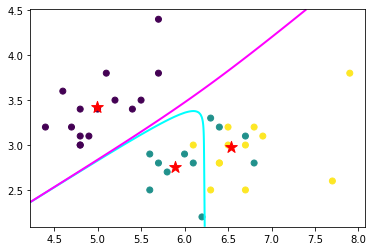

In [104]:

# сам scatter plot
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z0 = Z[:, 0].reshape(xx.shape)
Z1 = Z[:, 1].reshape(xx.shape)

plt.contour(xx, yy, Z1, [0.5], linewidths=2., colors='cyan')
plt.contour(xx, yy, Z0, [0.5], linewidths=2., colors='magenta')
plt.show()

# Кластеризация

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Приведём к одному масштабу фичи

In [107]:
scaler = StandardScaler()

In [115]:
X_scaled = scaler.fit_transform(data)

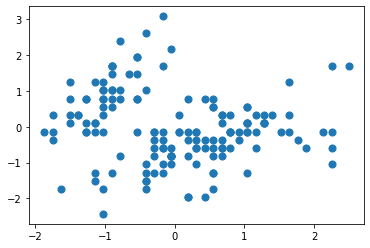

In [122]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=50)

Будем решать задачу кластеризации методом KMeans для количества кластеров от 1 до 19. Будем считать метрику inertia_ и будем судить о каестве кластеризации в зависимости от инерции. В целом, будем делать то же, что и на вэбинаре

In [112]:
# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

Построим график локтя

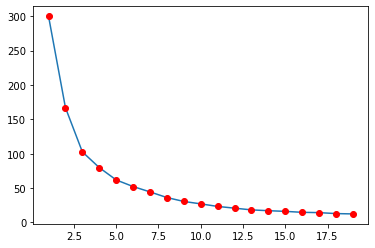

In [113]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Похоже, 3 класса - это "локоть". При большем значении кластеров качество растёт не так быстро

In [114]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)


Визуализируем кластеризацию

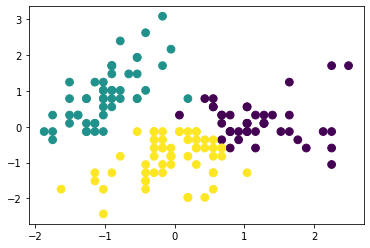

In [111]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='viridis', c=clusters, s=60)

Заметим, что число кластеров получилось равным количеству типов ирисов, то есть целевой переменной